<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

제2장 예측 분석 모형 평가

In [12]:
from collections.abc import MutableSequence
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from statsmodels.formula.api import ols
import math
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp','hp','wt','qsec']]
y = data['mpg']
fit = ols('y~x', data=data).fit()
# fit.summary()
data['pred'] = fit.fittedvalues
print(data.head())
print('$$$(실제값, 예측값) 첫 10행 출력$$$')
results = data[['mpg','pred']].head(10)
print(results.head(10))
me = (data['mpg'] - data['pred']).mean()
print('평균 예측 오차(Mean of Errors)/ME: ', end='')
print(me)
mse = ((data['mpg'] - data['pred'])**2).mean()
print('평균 제곱 오차(Mean of Squared Errors)/MSE: ', end='')
print(mse)
rmse = math.sqrt(mse)
print('평균 제곱근 오차(Root Mean Squared Errors)/RMSE: ', end='')
print(rmse)
mae = abs(data['mpg'] - data['pred']).mean()
print('평균 절대 오차(Mean Absolute Error)/MAE: ', end='')
print(mae)
mape = abs((data['mpg'] - data['pred'])/data['mpg']).mean()
print('평균 절대 백분율 오차(Mean Absolute Percentage Error)/MAPE: ', end='')
print(mape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                           

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squa

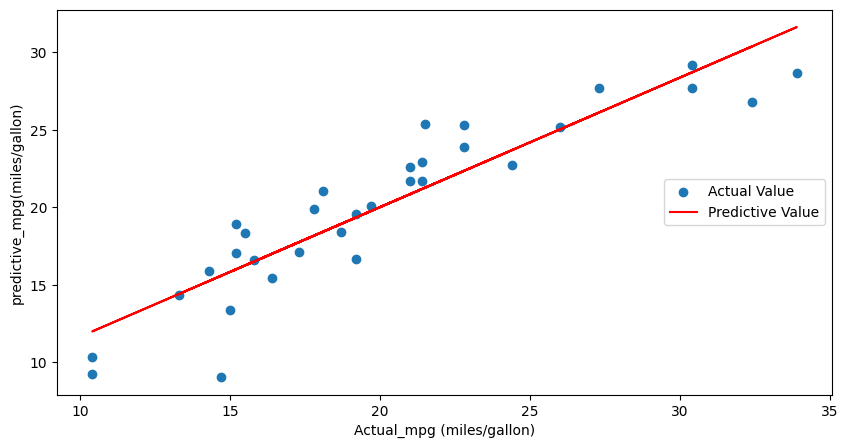

In [19]:
import pandas as pd
from statsmodels.formula.api import ols
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp','hp','wt','qsec']]
y = data['mpg']
fit = ols('y ~ x', data=data).fit()
print(fit.summary())
data['pred'] = fit.fittedvalues
print('$$$잔차값, Residuals, 첫5행$$$')
print(fit.resid[:5])
print('잔차값의 평균: ', end='')
print(fit.resid.mean())
model = LinearRegression()
model.fit(data[['mpg']], data['pred'])
y_fit = model.predict(y.to_numpy().reshape(-1,1))
plt.figure(figsize=(10,5))
plt.scatter(y, data['pred'])
plt.plot(y, y_fit, color='red')
plt.xlabel('Actual_mpg (miles/gallon)')
plt.ylabel('predictive_mpg(miles/gallon)')
plt.legend(('Actual Value', 'Predictive Value'), loc='center right')
plt.show()

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/mtcars.csv', header=0, index_col=0)
print(data.head())
x = data[['disp','hp','wt','qsec']]
y = data['mpg']
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = DecisionTreeRegressor(max_depth=3, random_state=55)
results = model.fit(trainx, trainy)
print(model.score(trainx, trainy))

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
model                    
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  
0.9454044653052825
